In [1]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [2]:
user_agent = "web:CS579:v1.0 (by u/Relevant-Fig-773)"

reddit = praw.Reddit(
    client_id="qy6TBi9qSnML8nLApahmvg",
    client_secret="_TjZdio3jXn7Gpy6e2ABszjNIBX02w",
    user_agent=user_agent,
)

In [3]:
subreddit = reddit.subreddit("championsleague")

G = nx.Graph()

# Fetch data from top 10 hot posts and their comments
for submission in subreddit.hot(limit=10):
    G.add_node(submission.id, title=submission.title, type="post")  # distinguish between post and comment
    for comment in submission.comments:
        G.add_node(comment.id, title=comment.body, type="comment")
        G.add_edge(submission.id, comment.id)

# Check if the graph is connected
if not nx.is_connected(G):
    print("The graph is not connected. Analyzing the largest connected component.")

    # Analyze the largest connected component
    largest_component = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_component).copy()

# Save graph data using pickle
with open("championsleague_graph.pkl", "wb") as f:
    pickle.dump(G, f)

# Load graph data
with open("championsleague_graph.pkl", "rb") as f:
    loaded_G = pickle.load(f)

# Print basic graph info
print("Number of nodes:", loaded_G.number_of_nodes())
print("Number of edges:", loaded_G.number_of_edges())

The graph is not connected. Analyzing the largest connected component.
Number of nodes: 54
Number of edges: 53


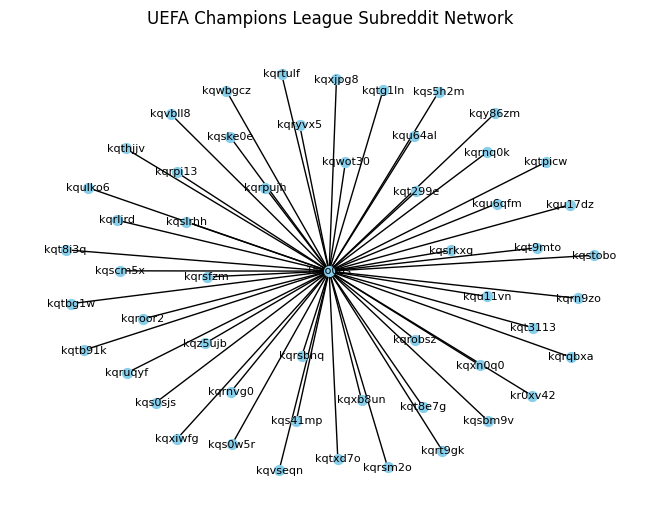

In [4]:
# Visualize the graph
pos = nx.spring_layout(loaded_G)  # you can try different layout algorithms
nx.draw(loaded_G, pos, with_labels=True, font_size=8, node_size=50, node_color="skyblue", font_color="black")
plt.title("UEFA Champions League Subreddit Network")
plt.show()

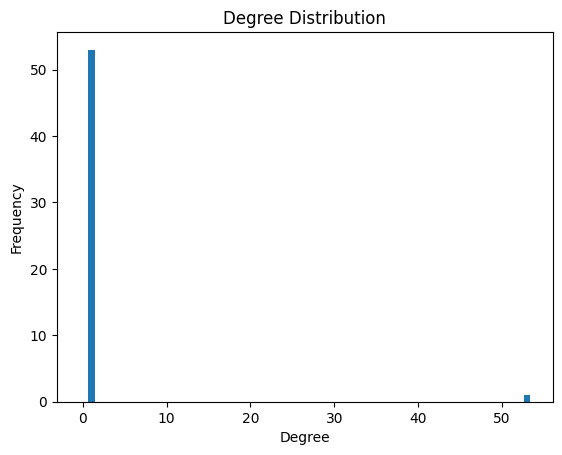

Clustering Coefficient: {'kqu64al': 0, 'kqulko6': 0, 'kqruqyf': 0, 'kqscm5x': 0, 'kqu6qfm': 0, 'kqrnq0k': 0, 'kqwot30': 0, 'kqrsm2o': 0, 'kqt9mto': 0, 'kqrtulf': 0, 'kr0xv42': 0, 'kqryvx5': 0, 'kqtg1ln': 0, 'kqrnvg0': 0, 'kqrpi13': 0, 'kqs41mp': 0, 'kqslrhh': 0, 'kqy86zm': 0, '1aso0as': 0, 'kqthjjv': 0, 'kqs0sjs': 0, 'kqstobo': 0, 'kqwbgcz': 0, 'kqs0w5r': 0, 'kqske0e': 0, 'kqrqbxa': 0, 'kqt8e7g': 0, 'kqvseqn': 0, 'kqxiwfg': 0, 'kqt3113': 0, 'kqtpicw': 0, 'kqroor2': 0, 'kqtb91k': 0, 'kqs5h2m': 0, 'kqrljrd': 0, 'kqrpujh': 0, 'kqrobsz': 0, 'kqvbll8': 0, 'kqrn9zo': 0, 'kqtxd7o': 0, 'kqrsbhq': 0, 'kqrt9gk': 0, 'kqt8i3q': 0, 'kqxjpg8': 0, 'kqz5ujb': 0, 'kqtbg1w': 0, 'kqxb8un': 0, 'kqsbm9v': 0, 'kqu17dz': 0, 'kqu11vn': 0, 'kqxn0q0': 0, 'kqsrkxg': 0, 'kqt299e': 0, 'kqrsfzm': 0}
Pagerank: {'kqu64al': 0.010170332225797005, 'kqulko6': 0.010170332225797005, 'kqruqyf': 0.010170332225797005, 'kqscm5x': 0.010170332225797005, 'kqu6qfm': 0.010170332225797005, 'kqrnq0k': 0.010170332225797005, 'kqwot30':

In [5]:
# Calculate network measures
degree_distribution = nx.degree_histogram(loaded_G)
clustering_coefficient = nx.clustering(loaded_G)
pagerank = nx.pagerank(loaded_G)
diameter = nx.diameter(loaded_G)
closeness_centrality = nx.closeness_centrality(loaded_G)
betweenness_centrality = nx.betweenness_centrality(loaded_G)

# Plot Degree Distribution
plt.bar(range(len(degree_distribution)), degree_distribution, align="center")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Print other measures (customize based on your needs)
print("Clustering Coefficient:", clustering_coefficient)
print("Pagerank:", pagerank)
print("Diameter:", diameter)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)